# Classifier Evaluation Lab

* Copy&paste your model for homework5 model
* Add grid search and train
* Compare performance
* Which one is better? Explain?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
numerical_features = []
categorical_features = []
for i in df:
    if i in ['frequency_of_travel', 'department','gender','position','satisfaction_with_job','married_or_single','satisfaction_with_environment']:
        categorical_features.append(i)
    else:
        numerical_features.append(i)
numerical_features.remove('left_company')
numerical_features.remove('years_in_current_job')
numerical_features.remove('years_with_current_supervisor')

<AxesSubplot:>

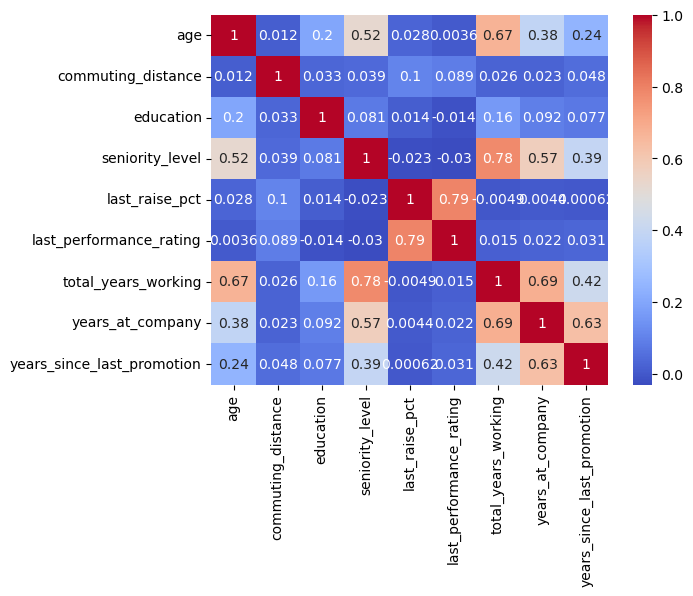

In [3]:
corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [4]:
from sklearn.model_selection import train_test_split

features = [x for x in df.columns if x != 'left_company' and x != 'years_in_current_job' and x != 'years_with_current_supervisor']

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')


Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_since_last_promotion


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [6]:
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [7]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['age', 'commuting_distance', 'education',
                                  'seniority_level', 'last_raise_pct',
                                  'last_performance_rating',
                                  'total_years_working', 'years_at_company',
                                  'years_since_last_promotion']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                  

In [8]:
X_train_processed = processing_pipeline.fit_transform(X_train)

# check the shape of the processed dataset
print(X_train_processed.shape)

(800, 30)


In [9]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LogisticRegression(penalty='l2'))])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'seniority_level',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                               

In [10]:
accuracy = modeling_pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.68


In [11]:
y_hat_train = modeling_pipeline.predict(X_train)
y_hat_test = modeling_pipeline.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_hat_train)
test_acc = accuracy_score(y_test, y_hat_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.74625
Test accuracy: 0.68


In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numerical_features),
        ('cat', categorical_transformer,categorical_features)
    ])

lg_pipe = modeling_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )

param_grid = [
  {
    'logreg__C': [1, 10, 100, 1000], 
    'pca__n_components': [1,2,3,4,5,10,15]
  }
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

In [14]:
print(gcv_results)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'commuting_distance',
                                                                          'education',
                                                                          'seniority_level',
                                                                          'last_raise_pct',
                                                                          'last_performance_rating',
                                                                          'total_years_working',
                                                                          'years_at_company',
                                

In [15]:
gcv_results.cv_results_

{'mean_fit_time': array([0.00701475, 0.01167479, 0.00977349, 0.00905418, 0.00945053,
        0.00944977, 0.00625215, 0.01259398, 0.00422287, 0.00937324,
        0.00935035, 0.00632701, 0.00937357, 0.00696163, 0.00624833,
        0.00716677, 0.00938005, 0.0136981 , 0.01123867, 0.00945063,
        0.00987329, 0.00582623, 0.00844417, 0.00632563, 0.00624866,
        0.00632691, 0.00925064, 0.00834908]),
 'std_fit_time': array([0.00553431, 0.00605107, 0.00718991, 0.00741605, 0.00582592,
        0.00771699, 0.00765728, 0.00679116, 0.00607871, 0.00765322,
        0.00763464, 0.00594272, 0.00765349, 0.00722082, 0.00765261,
        0.00635777, 0.00613897, 0.00723289, 0.00332837, 0.00771766,
        0.00811321, 0.00716697, 0.00791747, 0.00774822, 0.00765302,
        0.00821453, 0.00755647, 0.0070686 ]),
 'mean_score_time': array([0.0050725 , 0.00090098, 0.00312443, 0.00624695, 0.        ,
        0.00312428, 0.0093699 , 0.        , 0.00834961, 0.0053257 ,
        0.00322657, 0.00312448, 0.006248

In [16]:
df1=pd.DataFrame(gcv_results.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007015,0.005534,0.005072,0.006409,1,1,"{'logreg__C': 1, 'pca__n_components': 1}",0.62500,0.64375,0.57500,0.56875,0.61875,0.60625,0.029315,25
1,0.011675,0.006051,0.000901,0.001802,1,2,"{'logreg__C': 1, 'pca__n_components': 2}",0.65625,0.65000,0.56875,0.58125,0.61250,0.61375,0.035223,20
2,0.009773,0.007190,0.003124,0.006249,1,3,"{'logreg__C': 1, 'pca__n_components': 3}",0.66875,0.65625,0.56875,0.58125,0.63750,0.62250,0.040234,10
3,0.009054,0.007416,0.006247,0.007651,1,4,"{'logreg__C': 1, 'pca__n_components': 4}",0.66250,0.64375,0.56875,0.58750,0.63125,0.61875,0.035134,17
4,0.009451,0.005826,0.000000,0.000000,1,5,"{'logreg__C': 1, 'pca__n_components': 5}",0.65625,0.64375,0.55625,0.58125,0.63750,0.61500,0.039051,19
5,0.009450,0.007717,0.003124,0.006249,1,10,"{'logreg__C': 1, 'pca__n_components': 10}",0.67500,0.62500,0.65000,0.66250,0.70625,0.66375,0.026926,7
6,0.006252,0.007657,0.009370,0.007650,1,15,"{'logreg__C': 1, 'pca__n_components': 15}",0.70625,0.66250,0.66875,0.67500,0.72500,0.68750,0.024044,1
7,0.012594,0.006791,0.000000,0.000000,10,1,"{'logreg__C': 10, 'pca__n_components': 1}",0.62500,0.64375,0.57500,0.56875,0.61875,0.60625,0.029315,25
8,0.004223,0.006079,0.008350,0.007069,10,2,"{'logreg__C': 10, 'pca__n_components': 2}",0.65625,0.65000,0.56875,0.58125,0.61250,0.61375,0.035223,20
9,0.009373,0.007653,0.005326,0.006684,10,3,"{'logreg__C': 10, 'pca__n_components': 3}",0.66875,0.65000,0.56875,0.58125,0.63750,0.62125,0.039251,11


In [17]:
gcv_results.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'seniority_level',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_since_last_promotion']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['frequency_of_travel',
                                                   'department',
                 

In [18]:
gcv_results.best_params_

{'logreg__C': 1, 'pca__n_components': 15}

In [19]:
gcv_results.best_score_

0.6874999999999999

In [20]:
y_testp = gcv_results.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

          No       0.64      0.60      0.62        93
         Yes       0.67      0.71      0.69       107

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'commuting_distance', 'education', 'seniority_level', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_since_last_promotion']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['frequency_of_travel', 'department', 'satisfaction_with_environment', 'gender', 'position', 'satisfaction_with_job', 'married_or_single'])
    ])


In [22]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('logreg', LogisticRegression(C=1, solver='liblinear'))
])


In [23]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'seniority_level',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_since_last_promotion']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['frequency_of_travel',
                                                   'department',
                 

In [24]:
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.66


In [25]:
y_train_p1 = pipeline.predict(X_train)
y_test_p1 = pipeline.predict(X_test)

# calculate the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_p1)
test_accuracy = accuracy_score(y_test, y_test_p1)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.70875
Testing accuracy: 0.66


#### Which one is better? Explain?

* When comparing both accuracy, the first logistic regression gave accuracy of 68 whereas the best hyper parameter logistic regression using grid search gave accuracy of 66. 
* There is not much difference in accuracy when implemented with best hyperparameter, I think logistic regression is not the best to implement for this case. We have to choose another algorithm.